<a href="https://colab.research.google.com/github/efehakanyildiz/MenuSuggestion/blob/main/MenuSuggestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv('/content/full_restaurant_data_with_type.csv')

In [20]:
df.head(5
        )

,Order Number,Order Date,Item Name,Quantity,Product Price,Total products,Total_Amount,Total_People,Gender_Ratio,Item Rating,Order Average Rating,Item Type
0,16118,03/08/2019 20:25,Plain Papadum,2,0.80,6,30.1,6,3 Male / 3 Female,4,4.0,Starter
1,16118,03/08/2019 20:25,King Prawn Balti,1,12.95,6,30.1,6,3 Male / 3 Female,5,4.0,Main Course
2,16118,03/08/2019 20:25,Garlic Naan,1,2.95,6,30.1,6,3 Male / 3 Female,3,4.0,Bread
3,16118,03/08/2019 20:25,Mushroom Rice,1,3.95,6,30.1,6,3 Male / 3 Female,5,4.0,Rice
4,16118,03/08/2019 20:25,Paneer Tikka Masala,1,8.95,6,30.1,6,3 Male / 3 Female,5,4.0,Main Course


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order Number          74818 non-null  int64  
 1   Order Date            74818 non-null  object 
 2   Item Name             74818 non-null  object 
 3   Quantity              74818 non-null  int64  
 4   Product Price         74818 non-null  float64
 5   Total products        74818 non-null  int64  
 6   Total_Amount          74818 non-null  float64
 7   Total_People          74818 non-null  int64  
 8   Gender_Ratio          74818 non-null  object 
 9   Item Rating           74818 non-null  int64  
 10  Order Average Rating  74818 non-null  float64
dtypes: float64(3), int64(5), object(3)
memory usage: 6.3+ MB


In [17]:
df['Item Name'].value_counts()


,count
Item Name,
Aloo Chaat,1
Aloo Gobi,1
Aloo Methi,1
Baingan Hari Mirch,1
Bengal Fish Biryani,1
...,...
Vindaloo - Chicken Tikka,1
Vindaloo - King Prawn,1
Vindaloo - Lamb,1


In [26]:
df['Item Type'].value_counts()

,count
Item Type,
Other,30678
Main Course,15406
Rice,13550
Bread,10081
Starter,4905
Drink,198


Veri yüklendi: 74818 satır, 12 sütun
Toplam benzersiz yemek: 248
Kaç kişi için menü önerisi istiyorsunuz? 2
Toplam bütçeniz ne kadar? (£) 24

===== MENÜ ÖNERİLERİ =====
Kişi sayısı: 2
Bütçe: £24.00

Öneri 1: Ekonomik Menü (Bütçenin %80'i)
Toplam maliyet: £19.20
Ortalama puan: 4.17
Önerilen yemekler:

  Main Course:
    - King Prawn Balti (£12.95, Puan: 5.0)

  Starter:
    - Plain Papadum (£0.80, Puan: 4.0)

  Rice:
    - Mushroom Rice (£3.95, Puan: 5.0)

  Other:
    - Red Sauce (£0.50, Puan: 5.0)
    - Mint Sauce (£0.50, Puan: 4.0)
    - Mango Chutney (£0.50, Puan: 2.0)

Öneri 2: Standart Menü (Tam Bütçe)
Toplam maliyet: £23.70
Ortalama puan: 4.60
Önerilen yemekler:

  Main Course:
    - King Prawn Balti (£12.95, Puan: 5.0)
    - Paneer Tikka Masala (£8.95, Puan: 5.0)

  Starter:
    - Plain Papadum (£0.80, Puan: 4.0)

  Other:
    - Red Sauce (£0.50, Puan: 5.0)
    - Mint Sauce (£0.50, Puan: 4.0)

Öneri 3: Premium Menü (Bütçenin %120'si)
Toplam maliyet: £28.80
Ortalama puan: 4.75
Ön

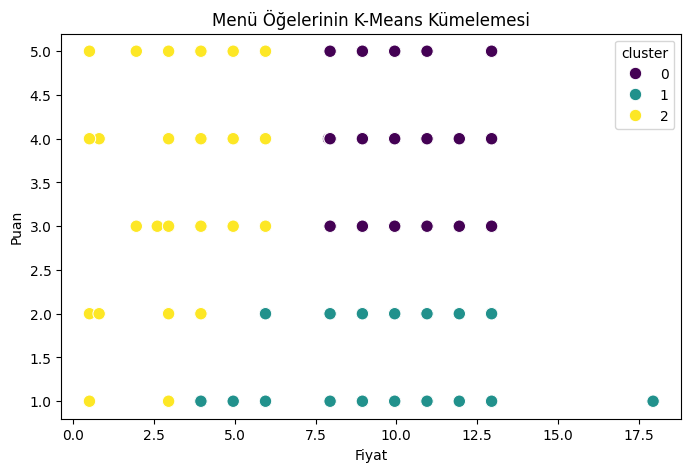

In [28]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_prepare_data():
    """CSV dosyasından veriyi yükle ve hazırla"""
    df = pd.read_csv('/content/full_restaurant_data_with_type.csv')
    print(f"Veri yüklendi: {df.shape[0]} satır, {df.shape[1]} sütun")


    items_info = {}
    for _, row in df.iterrows():
        item_name = row['Item Name']
        if item_name not in items_info:
            items_info[item_name] = {
                'price': row['Product Price'],
                'rating': row['Item Rating'],
                'type': row['Item Type']
            }


    items_df = pd.DataFrame.from_dict(items_info, orient='index')
    items_df.reset_index(inplace=True)
    items_df.rename(columns={'index': 'item_name'}, inplace=True)

    print(f"Toplam benzersiz yemek: {len(items_df)}")
    return items_df

def apply_kmeans(items_df, n_clusters=3):
    """Yemeklere K-Means kümeleme uygula"""

    X = items_df[['price', 'rating']].copy()


    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)


    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X_scaled)


    items_df['cluster'] = kmeans.labels_




    return items_df

def recommend_menu(items_df, num_people, budget):
    """Kişi sayısı ve bütçeye göre menü önerileri sun"""
    print(f"\n===== MENÜ ÖNERİLERİ =====")
    print(f"Kişi sayısı: {num_people}")
    print(f"Bütçe: £{budget:.2f}")


    low_budget = budget * 0.8   # %80'i
    high_budget = budget * 1.2  # %120'si

    # Yemekleri puanlarına göre sırala
    sorted_by_rating = items_df.sort_values(by='rating', ascending=False)


    items_df['value_ratio'] = items_df['rating'] / items_df['price']
    best_value = items_df.sort_values(by='value_ratio', ascending=False)


    recommendations = []

    main_courses = sorted_by_rating[sorted_by_rating['type'] == 'Main Course']
    rice = sorted_by_rating[sorted_by_rating['type'] == 'Rice']
    breads = sorted_by_rating[sorted_by_rating['type'] == 'Bread']
    starters = sorted_by_rating[sorted_by_rating['type'] == 'Starter']
    drinks = sorted_by_rating[sorted_by_rating['type'] == 'Drink']  # Drink kategorisini ekle

    rec1_items = []
    total_cost = 0


    for i in range(min(num_people, len(main_courses))):
        if total_cost + main_courses.iloc[i]['price'] <= low_budget:
            rec1_items.append(main_courses.iloc[i])
            total_cost += main_courses.iloc[i]['price']

    # Pilav ekle
    if len(rice) > 0 and total_cost + rice.iloc[0]['price'] <= low_budget:
        rec1_items.append(rice.iloc[0])
        total_cost += rice.iloc[0]['price']

    if len(breads) > 0 and total_cost + breads.iloc[0]['price'] <= low_budget:
        rec1_items.append(breads.iloc[0])
        total_cost += breads.iloc[0]['price']


    if len(starters) > 0 and total_cost + starters.iloc[0]['price'] <= low_budget:
        rec1_items.append(starters.iloc[0])
        total_cost += starters.iloc[0]['price']


    drinks_needed = max(1, num_people // 2)
    for i in range(min(drinks_needed, len(drinks))):
        if total_cost + drinks.iloc[i]['price'] <= low_budget:
            rec1_items.append(drinks.iloc[i])
            total_cost += drinks.iloc[i]['price']


    for _, item in best_value.iterrows():
        if item['item_name'] not in [i['item_name'] for i in rec1_items]:
            if total_cost + item['price'] <= low_budget:
                rec1_items.append(item)
                total_cost += item['price']

    recommendations.append({
        "name": "Ekonomik Menü (Bütçenin %80'i)",
        "items": rec1_items,
        "total_cost": total_cost
    })


    rec2_items = []
    total_cost = 0


    for i in range(min(num_people, len(main_courses))):
        if total_cost + main_courses.iloc[i]['price'] <= budget:
            rec2_items.append(main_courses.iloc[i])
            total_cost += main_courses.iloc[i]['price']

    rice_needed = max(1, num_people // 2)
    for i in range(min(rice_needed, len(rice))):
        if total_cost + rice.iloc[i]['price'] <= budget:
            rec2_items.append(rice.iloc[i])
            total_cost += rice.iloc[i]['price']


    bread_needed = max(1, num_people // 2)
    for i in range(min(bread_needed, len(breads))):
        if total_cost + breads.iloc[i]['price'] <= budget:
            rec2_items.append(breads.iloc[i])
            total_cost += breads.iloc[i]['price']


    starters_needed = max(1, num_people // 3)
    for i in range(min(starters_needed, len(starters))):
        if total_cost + starters.iloc[i]['price'] <= budget:
            rec2_items.append(starters.iloc[i])
            total_cost += starters.iloc[i]['price']


    drinks_needed = num_people
    for i in range(min(drinks_needed, len(drinks))):
        if total_cost + drinks.iloc[i]['price'] <= budget:
            rec2_items.append(drinks.iloc[i])
            total_cost += drinks.iloc[i]['price']


    for _, item in best_value.iterrows():
        if item['item_name'] not in [i['item_name'] for i in rec2_items]:
            if total_cost + item['price'] <= budget:
                rec2_items.append(item)
                total_cost += item['price']

    recommendations.append({
        "name": "Standart Menü (Tam Bütçe)",
        "items": rec2_items,
        "total_cost": total_cost
    })


    rec3_items = []
    total_cost = 0


    for i in range(min(num_people, len(main_courses))):
        if total_cost + main_courses.iloc[i]['price'] <= high_budget:
            rec3_items.append(main_courses.iloc[i])
            total_cost += main_courses.iloc[i]['price']

    rice_needed = max(1, num_people // 2)
    for i in range(min(rice_needed, len(rice))):
        if total_cost + rice.iloc[i]['price'] <= high_budget:
            rec3_items.append(rice.iloc[i])
            total_cost += rice.iloc[i]['price']


    bread_needed = max(1, num_people // 2)
    for i in range(min(bread_needed, len(breads))):
        if total_cost + breads.iloc[i]['price'] <= high_budget:
            rec3_items.append(breads.iloc[i])
            total_cost += breads.iloc[i]['price']


    starters_needed = max(1, num_people // 2)
    for i in range(min(starters_needed, len(starters))):
        if total_cost + starters.iloc[i]['price'] <= high_budget:
            rec3_items.append(starters.iloc[i])
            total_cost += starters.iloc[i]['price']


    for i in range(min(num_people, len(drinks))):
        if total_cost + drinks.iloc[i]['price'] <= high_budget:
            rec3_items.append(drinks.iloc[i])
            total_cost += drinks.iloc[i]['price']


    for _, item in best_value.iterrows():
        if item['item_name'] not in [i['item_name'] for i in rec3_items]:
            if total_cost + item['price'] <= high_budget:
                rec3_items.append(item)
                total_cost += item['price']
                if len(rec3_items) >= num_people * 3:  # Her kişi için ortalama 3 yemek ile sınırla
                    break

    recommendations.append({
        "name": "Premium Menü (Bütçenin %120'si)",
        "items": rec3_items,
        "total_cost": total_cost
    })


    for i, rec in enumerate(recommendations):
        print(f"\nÖneri {i+1}: {rec['name']}")
        print(f"Toplam maliyet: £{rec['total_cost']:.2f}")
        print(f"Ortalama puan: {np.mean([item['rating'] for item in rec['items']]):.2f}")
        print("Önerilen yemekler:")


        categories = ["Main Course", "Starter", "Rice", "Bread", "Drink", "Other"]

        for category in categories:
            category_items = [item for item in rec['items'] if item['type'] == category]
            if category_items:
                print(f"\n  {category}:")
                for item in category_items:
                    print(f"    - {item['item_name']} (£{item['price']:.2f}, Puan: {item['rating']:.1f})")


        other_items = [item for item in rec['items'] if item['type'] not in categories]
        if other_items:
            print("\n  Diğer:")
            for item in other_items:
                print(f"    - {item['item_name']} (£{item['price']:.2f}, Puan: {item['rating']:.1f}, {item['type']})")

    return recommendations


def main():
    """Ana program akışı"""
    try:

        items_df = load_and_prepare_data()


        items_df = apply_kmeans(items_df)


        num_people = int(input("Kaç kişi için menü önerisi istiyorsunuz? "))
        budget = float(input("Toplam bütçeniz ne kadar? (£) "))


        recommend_menu(items_df, num_people, budget)

        print("\nProgram başarıyla tamamlandı!")
        print("menu_clusters.png dosyasında kümelerin görselleştirmesini bulabilirsiniz.")

    except Exception as e:
        print(f"Hata oluştu: {e}")

if __name__ == "__main__":
    main()